# Cosmic Evolution: Dark Energy vs. No Dark Energy

Motivation


In the early 20th century, scientists discovered that the universe was expanding. In the late 20th century, they found that this expansion was accelerating which is the opposite of what they initially thought. To explain this, the concept of dark energy was introduced. This is theorized to be represnted by lambda in cosmological equations and is known as the cosmological constant. Intrigued by the profound implications of dark energy on the cosmic scale, this project embarks on an exploration of an alternative cosmological scenario—one devoid of dark energy. The central motivation is to delve deeper into the dynamics of the universe and scrutinize the consequences of removing dark energy from the cosmological equations. By undertaking a comparative analysis between Friedmanns equation with dark energy and an alternative model without it, I aim to find the specific influence of dark energy on the evolution of the cosmos over time. At the heart of this investigation lies a fundamental question: What is the discernible difference in the size of the universe today when comparing models with and without dark energy? By numerically solving the Friedmann equations for both scenarios, we seek to quantify and comprehend the impact of dark energy on the current state and dimensions of the universe, shedding light on the intricate interplay between dark energy and cosmic evolution.



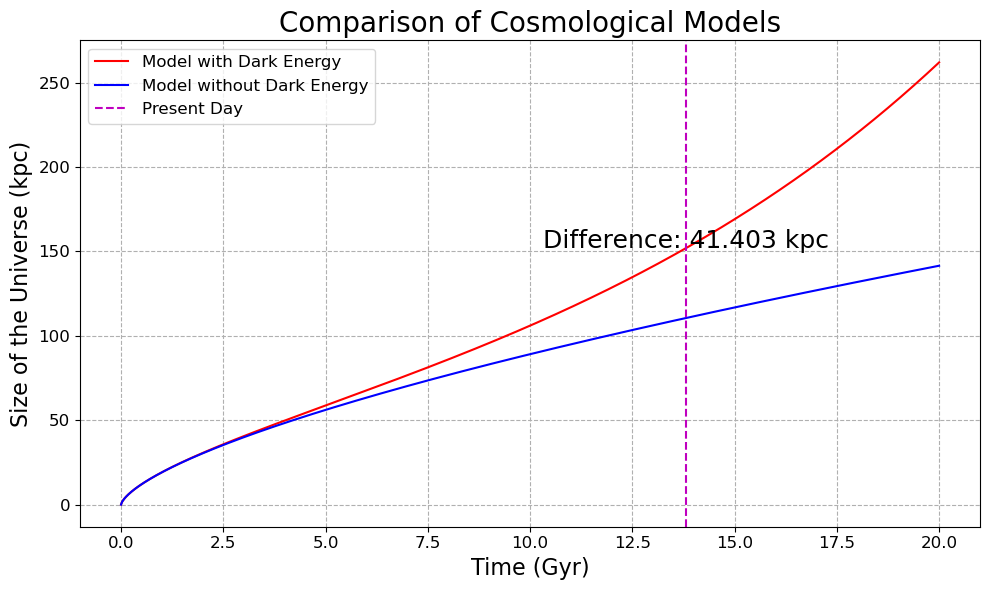

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Function that returns da/dt for friedmanns equations of a flat universe
def friedmann_eq(t, y, H0, omega_m, omega_r, omega_lambda):
    a = y[0]
    dydt = H0 * a * np.sqrt(omega_m / a**3 + omega_r / a**4 + omega_lambda)
    return [dydt]

# Function that returns da/dt for model without dark energy (also a flat universe)
def friedmann_eq_no_dark_energy(t, y, H0, omega_m, omega_r):
    a = y[0]
    dydt = H0 * a * np.sqrt(omega_m / a**3 + omega_r / a**4)
    return [dydt]

a0 = 1e-3  # Initial scale factor (scaled down by a factor of 800), arbitrary
H0 = 0.1  # Hubble constant (scaled down by a factor of 800), estimated
omega_m = 0.315  # Matter density parameter, estimated
omega_r = 9.2e-5  # Radiation density parameter, estimated
omega_lambda = 0.73  # Dark energy density parameter, estimated

# Time grid
t_span = (0, 20)  
t_eval = np.linspace(t_span[0], t_span[1], 1000) 

#finding the scale factor 'a' over time
solution_dark_energy = solve_ivp(friedmann_eq,t_span,y0=[a0],t_eval=t_eval,args=(H0, omega_m, omega_r, omega_lambda))
solution_no_dark_energy = solve_ivp(friedmann_eq_no_dark_energy,t_span,y0=[a0],t_eval=t_eval,args=(H0, omega_m, omega_r))


# Calculate the size of the universe using 'a' which was solved for using solve ivp and adds in a factor for units
size_dark_energy = H0 * solution_dark_energy.y[0] * 1e3
size_no_dark_energy = H0 * solution_no_dark_energy.y[0] * 1e3

# Calculate the difference in size at the present day
present_day_index = np.argmax(solution_dark_energy.t >= 13.8)  #present day at 13.8 billion years
size_difference = size_dark_energy[present_day_index] - size_no_dark_energy[present_day_index]


plt.figure(figsize=(10, 6))

#used .t to get the scale factor at every time in the array 
plt.plot(solution_dark_energy.t, size_dark_energy, label='Model with Dark Energy', color='red')
plt.plot(solution_no_dark_energy.t, size_no_dark_energy, label='Model without Dark Energy', color='blue')

#present day
plt.axvline(13.8, color='m', linestyle='--', label='Present Day')

# difference in models (kpc) at the present day
plt.text(13.8, size_dark_energy[present_day_index], 'Difference: ' + str(round(size_difference, 3)) + ' kpc', ha='center', fontsize=18)

plt.xlabel('Time (Gyr)', fontsize=16)
plt.ylabel('Size of the Universe (kpc)', fontsize=16)
plt.legend(fontsize=12)
plt.title('Comparison of Cosmological Models', fontsize=20)
plt.grid(True, linestyle='--')

# Increase tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()


## Results



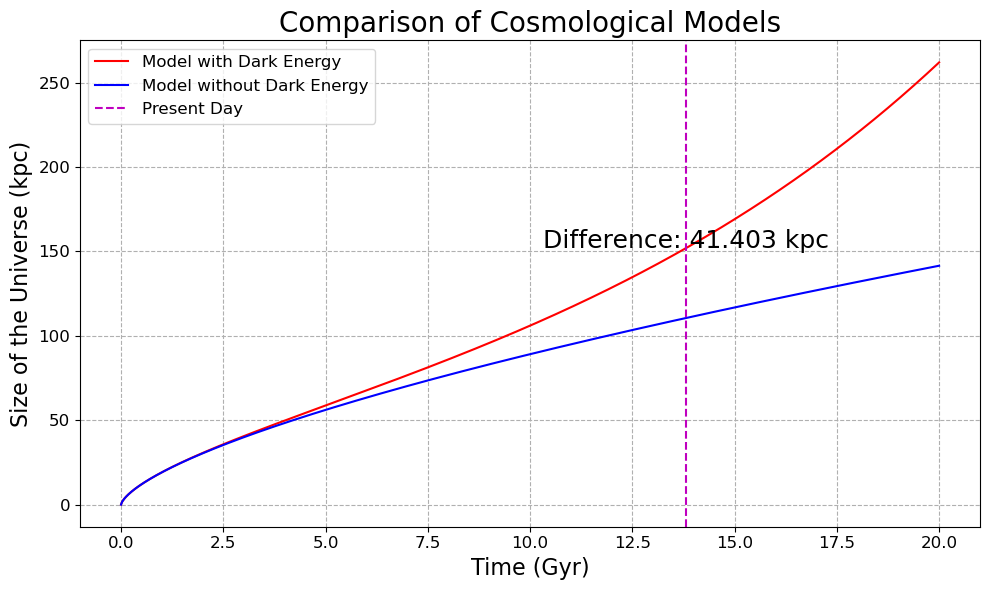

The model shows a large discrepency in size of the universe when its plotted with and without dark energy present. Without dark energy, we still see an expansion as expected, but the rate is decelerating due to matter density being the main constituent of the universe making gravity the dominant force, whcih is attractive. With dark energy present, we observe an accelerated expansion rate. This is because as the universe expands, matter and radiaiton density is diluted, promoting the constant dark energy density as the main constitutent. This then further promotes expansion which further promotes dark energy. W

We also see that at current day (13.8 billion years), the universe is 41.403 kpc larger than it would be if dark energy did not exist. This is a massive and monumental difference.